##  Acknowledment:
The datasource requires me to include the following bibtex snippet:
```
 @article{ulanowicz1998network,
      title={Network analysis of trophic dynamics in south florida ecosystems},
      author={Ulanowicz, Robert E and DeAngelis, Donald L},
      journal={FY97: The Florida Bay Ecosystem},
      pages={20688--20038},
      year={1998}
}
```

### Imports

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import re

### Task 1

In [2]:
eco_florida = nx.read_weighted_edgelist("eco-florida.edges")

Let's see how this graph looks like:

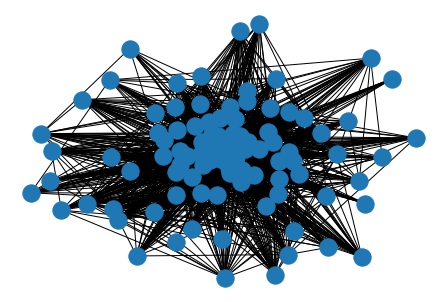

In [3]:
nx.draw(eco_florida)

As far as I see these are rarely useful. Let's do a degree distribution.

In [4]:
degrees_count = sorted([d for n, d in eco_florida.degree()], reverse=True)

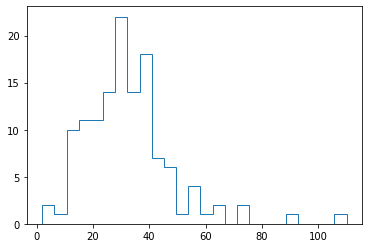

In [5]:
plt.hist(degrees_count, bins=25, histtype="step")
plt.show()

### Task 2
I've saved the whole tplge_contentin div from [kft publications list's](http://www.kft.pwr.edu.pl/?Publications) source code. I've noticed that each publication is a `<li>` tag like so:
```html
<li>M. Sonner, A. Sitek, L. Janker, D. Rudolph, D. Ruhstorfer, M. Döblinger, A. Manolescu, G. Abstreiter, J. Finley, A. Wixforth, G. Koblmüller, H. Krenner, <em>Breakdown of corner states and carrier localization by monolayer fluctuations in radial nanowire quantum wells, </em> <a href="https://dx.doi.org/10.1021/acs.nanolett.9b01028" target="_blank">Nano Letters <strong>19</strong>, 3336–3343 (2019)</a> <small><small>[IF(2018)=12.279, MNiSW 200 pkt, DONA 000220827]</small></small></li>
```
Which basically means I need to get everything between `<li>` and `,&nbsp;<em>` string. Lets try this out:
```sh
grep -oh '<li>[^<]*,&nbsp;<em>' raw.html | sed 's/<li>//; s/,&nbsp;<em>//' > names.list 
```
Returns a list where each line is a group of surnames, for example:
```
A. Y. Mitus, A. Z. Patashinskii
R. T. Lyzwa, A. Z. Patashinskii, A. Y. Mitus
A. C. Mitus
K. Parlinski, A. C. Mitus, R. Sikora, T. Wasiutynski
```
That's actually what I really wanted, nice. Now, we need import this to Python, get distinct names and then load everything onto a graph:

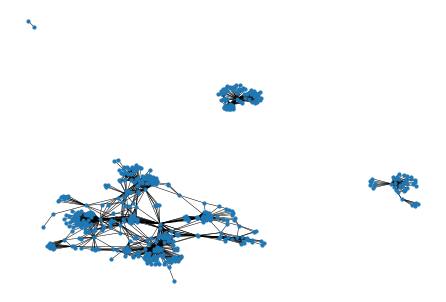

In [6]:
network = nx.Graph()
with open('names.list', 'r') as file:
    publications = file.readlines()

for publication in publications:
    for name in publication.rstrip().lstrip().split(', '):
        network.add_node(name)
        
for publication in publications:
    for name in publication.rstrip().lstrip().split(', '):
        for name2 in publication.rstrip().lstrip().split(', '):
            if (name != name2):
                network.add_edge(name, name2)
# nx.draw_kamada_kawai(network, node_size=10, width=0.5) # shows hubs and endnodes 
nx.draw(network, node_size=10, width=0.5) #shows separation into 4 chunks
#list(filter((lambda x: x[1] == 2), network.degree)) #dislpay the "endnodes"

### Task 3

In [7]:
!wget http://www.gutenberg.org/cache/epub/28885/pg28885.txt

--2019-11-11 23:43:00--  http://www.gutenberg.org/cache/epub/28885/pg28885.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 2610:28:3090:3000:0:bad:cafe:47, 152.19.134.47
Connecting to www.gutenberg.org (www.gutenberg.org)|2610:28:3090:3000:0:bad:cafe:47|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 177428 (173K) [text/plain]
Saving to: ‘pg28885.txt.1’

pg28885.txt.1       100%[===================>] 173.27K   174KB/s    in 1.0s    

2019-11-11 23:43:02 (174 KB/s) - ‘pg28885.txt.1’ saved [177428/177428]



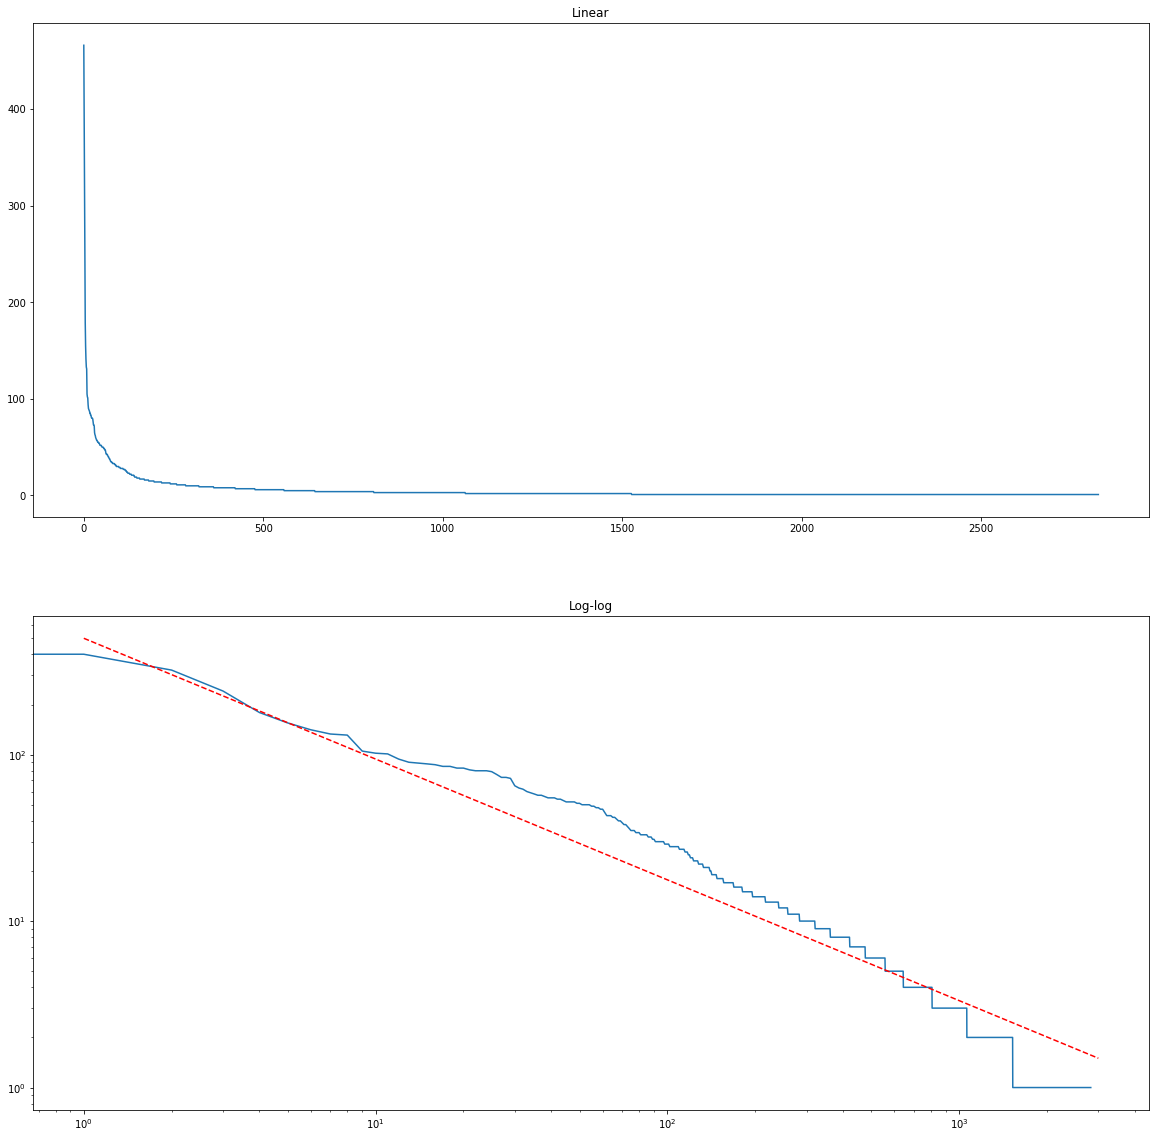

In [8]:
#0) Preparation

words = []
with open('pg28885.txt') as file:
    words = file.read()
#1) compute the frequency of each word inthe book
words = re.findall(r'(\b[A-Za-z][a-z]{3,21}\b)', words) #3 to get rid of "the"
words = map(str.lower, words) #About is the same as about, right?
frequency = {}
for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1

#2) sort them by frequency and give ranks – the most frequent word should haverank 1, etc. 
ranking = sorted(frequency.items(), key=lambda x: x[1], reverse=True) #rank 0 is actually the first item
#3) plot the dependence between frequency and rank in 2 scales: linear and log-logscale

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.plot([x[1] for x in ranking])
ax1.set_title('Linear')
ax2.loglog([x[1] for x in ranking])
ax2.set_title('Log-log')
ax2.plot([1, 3000], [500, 1.5], 'r--')
fig.set_size_inches(20, 20, forward=True)

\#4) find an exponent that describes a power-law for this book
The line above has a following equation: \
$y = ax + b$ &rarr; $y = -1,29x + 3,47$


3046 15717


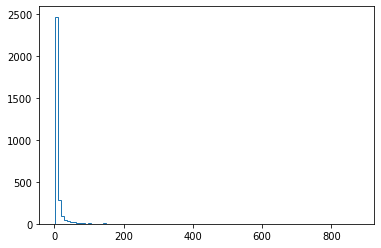

In [37]:
alice_n = nx.Graph()
words = []
with open('pg28885.txt') as file:
    words = file.read()
#1) compute the frequency of each word inthe book
words = re.findall(r'(\b[A-Za-z][a-z]{1,21}\b)', words) #we actually want to keep the short words this time
words = list(map(str.lower, words)) #still don't want to duplicate words
for word in set(words):
    alice_n.add_node(word)
    
for i in range(1, len(words)):
    alice_n.add_edge(words[i-1], words[i])

print(len(alice_n.nodes), len(alice_n.edges))
degrees_count = sorted([d for n, d in alice_n.degree()], reverse=True)
plt.hist(degrees_count, bins=100, histtype="step")
plt.show()
key_count_top = sorted([d for d in alice_n.degree()], key=lambda x: x[1], reverse=True)
key_count_bot = sorted([d for d in alice_n.degree()], key=lambda x: x[1])

In [40]:
print(key_count_top[0:10])
print(key_count_bot[0:10])

[('the', 880), ('and', 823), ('to', 554), ('of', 498), ('it', 450), ('in', 383), ('she', 318), ('you', 315), ('that', 285), ('alice', 280)]
[('vegetable', 1), ('hundreds', 1), ('pretend', 1), ('additions', 1), ('tillie', 1), ('whistle', 1), ('library', 1), ('detach', 1), ('globe', 1), ('couple', 1)]
